In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
import json

In [0]:
! git clone 'https://github.com/CSSEGISandData/COVID-19.git'

Cloning into 'COVID-19'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 17588 (delta 0), reused 2 (delta 0), pack-reused 17582
Receiving objects: 100% (17588/17588), 68.76 MiB | 38.90 MiB/s, done.
Resolving deltas: 100% (8867/8867), done.


In [0]:
daily_report_path = '/content/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
time_series_path = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series'

In [0]:
def keyFormat(month, date, year):
    return f"{month}-{date}-{year}"

def keyToDate(key):
    return map(int, key.split("-"))

def epochSecs(month, day, year):
    date = datetime(year, month, day)
    return (date - datetime.utcfromtimestamp(0)).total_seconds()

def epochSecsFile(filename, format=".csv"):
    month, day, year = map(int, filename[:-len(format)].split("-"))
    return epochSecs(month, day, year)

class KEYS:
    COUNTRY = "Country/Region"
    CONFIRMED = "Confirmed"
    DEATHS = "Deaths"
    RECOVERED = "Recovered"
    CUMULATIVE = "Cumulative"
    CURRENT = "Current"


In [0]:
data = {}

files = sorted(filter(lambda file: file.endswith(".csv"), os.listdir(daily_report_path)), key=epochSecsFile)

for file in files:

    print(f"for file {file}")
    month, date, year = map(int,file[:-4].split("-"))

    df = pd.read_csv(daily_report_path+file)
    df[[KEYS.CONFIRMED, KEYS.DEATHS, KEYS.RECOVERED]] = df[[KEYS.CONFIRMED, KEYS.DEATHS, KEYS.RECOVERED]].replace([np.NaN],[0])
    country_header = "Country_Region" if (month == 3 and date >= 22) or month >= 4 else "Country/Region"

    day_data = {}
    for index in df.index:
        country = df.loc[index][country_header]
        conf = int(df.loc[index][KEYS.CONFIRMED])
        death = int(df.loc[index][KEYS.DEATHS])
        recov = int(df.loc[index][KEYS.RECOVERED])

        if country not in day_data:
            day_data[country] = {KEYS.CONFIRMED: 0,
                                 KEYS.DEATHS: 0,
                                 KEYS.RECOVERED: 0}
        day_data[country][KEYS.CONFIRMED] += conf
        day_data[country][KEYS.DEATHS] += death
        day_data[country][KEYS.RECOVERED] += recov

    # print(day_data)
    for country, cData in day_data.items():

        if country not in data:
            data[country]={KEYS.CUMULATIVE: {KEYS.CONFIRMED:0, KEYS.DEATHS:0, KEYS.RECOVERED:0}}
        
        prev_conf = data[country][KEYS.CUMULATIVE][KEYS.CONFIRMED]
        prev_death = data[country][KEYS.CUMULATIVE][KEYS.DEATHS]
        prev_recov = data[country][KEYS.CUMULATIVE][KEYS.RECOVERED]

        conf, death, recov = cData[KEYS.CONFIRMED], cData[KEYS.DEATHS], cData[KEYS.RECOVERED]

        data[country][keyFormat(month, date, year)]={KEYS.CUMULATIVE: {KEYS.CONFIRMED: conf, 
                                                                       KEYS.DEATHS: death, 
                                                                       KEYS.RECOVERED: recov},
                                                     KEYS.CURRENT: {KEYS.CONFIRMED: conf - prev_conf, 
                                                                    KEYS.DEATHS: death - prev_death, 
                                                                    KEYS.RECOVERED: recov - prev_recov}
                                                     }
        data[country][KEYS.CUMULATIVE] = data[country][keyFormat(month, date, year)][KEYS.CUMULATIVE].copy()


In [100]:
# print(json.dumps(data, indent=4))
data["India"][keyFormat(3,21,2020)]

{'Cumulative': {'Confirmed': 330, 'Deaths': 4, 'Recovered': 23},
 'Current': {'Confirmed': 86, 'Deaths': -1, 'Recovered': 3}}

In [0]:
import matplotlib.pyplot as plt

In [0]:
cumm_conf, conf = [], []
cumm_death, death = [], []
cumm_recov, recov =[], []

sortedKeys = sorted( filter(lambda x:x!=KEYS.CUMULATIVE, data["India"]), key=lambda x:epochSecs(*keyToDate(x)))
for key in sortedKeys:
    conf.append(data["India"][key][KEYS.CURRENT][KEYS.CONFIRMED])
    death.append(data["India"][key][KEYS.CURRENT][KEYS.DEATHS])
    recov.append(data["India"][key][KEYS.CURRENT][KEYS.RECOVERED])

    cumm_conf.append(data["India"][key][KEYS.CUMULATIVE][KEYS.CONFIRMED])
    cumm_death.append(data["India"][key][KEYS.CUMULATIVE][KEYS.DEATHS])
    cumm_recov.append(data["India"][key][KEYS.CUMULATIVE][KEYS.RECOVERED])


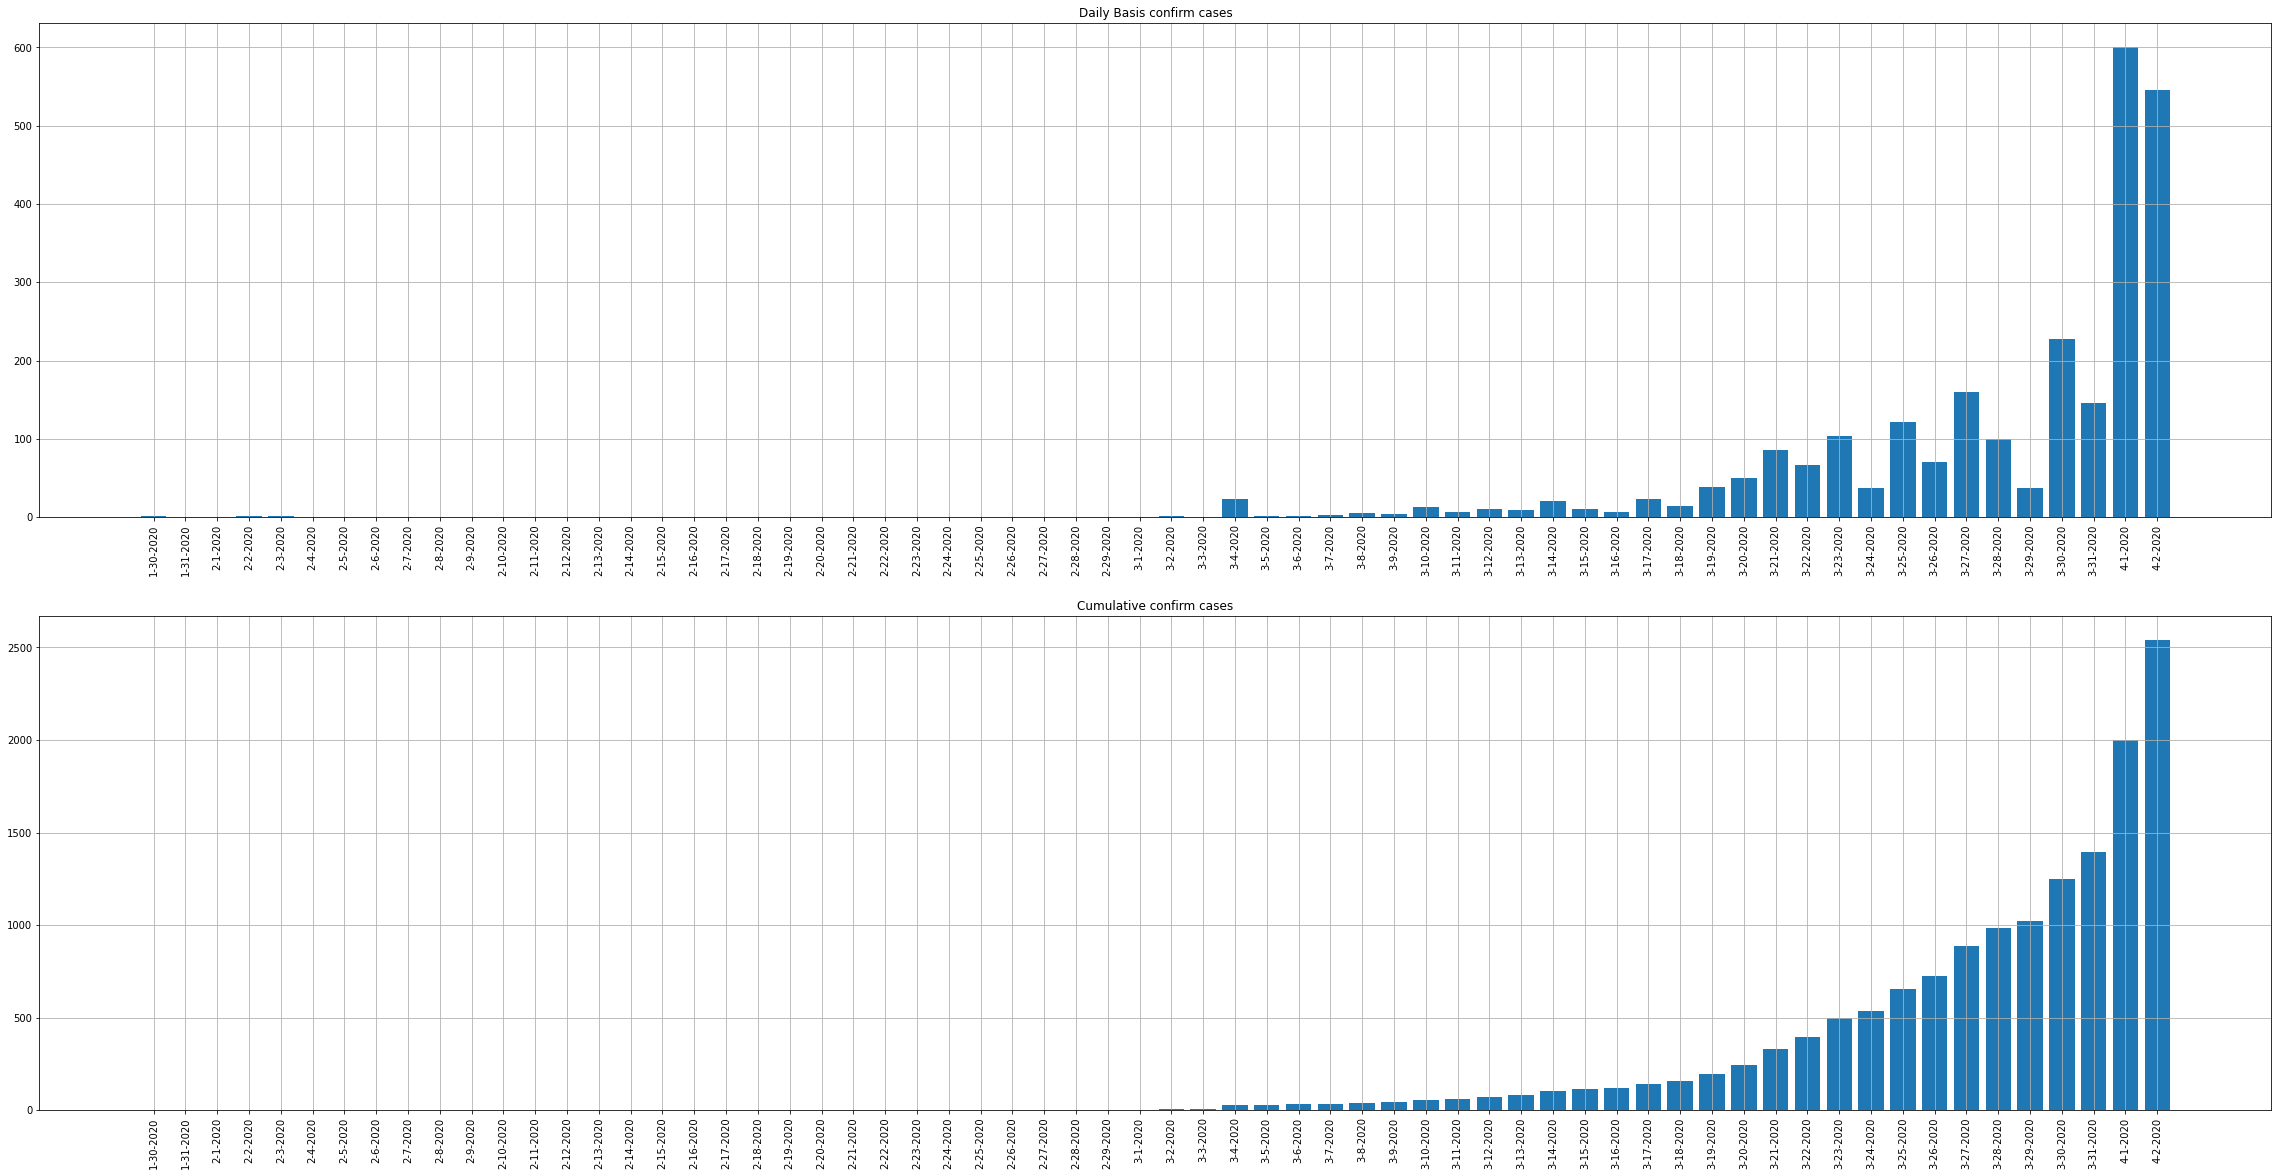

In [103]:
plt.figure("Confirmed cases",figsize=(40,20))
plt.subplot(211)
plt.title("Daily Basis confirm cases")
plt.bar(sortedKeys, conf)
plt.grid(True)
plt.xticks(rotation='vertical')

plt.subplot(212)
plt.title("Cumulative confirm cases")
plt.bar(sortedKeys, cumm_conf)
plt.grid(True)
plt.xticks(rotation='vertical')

plt.show()



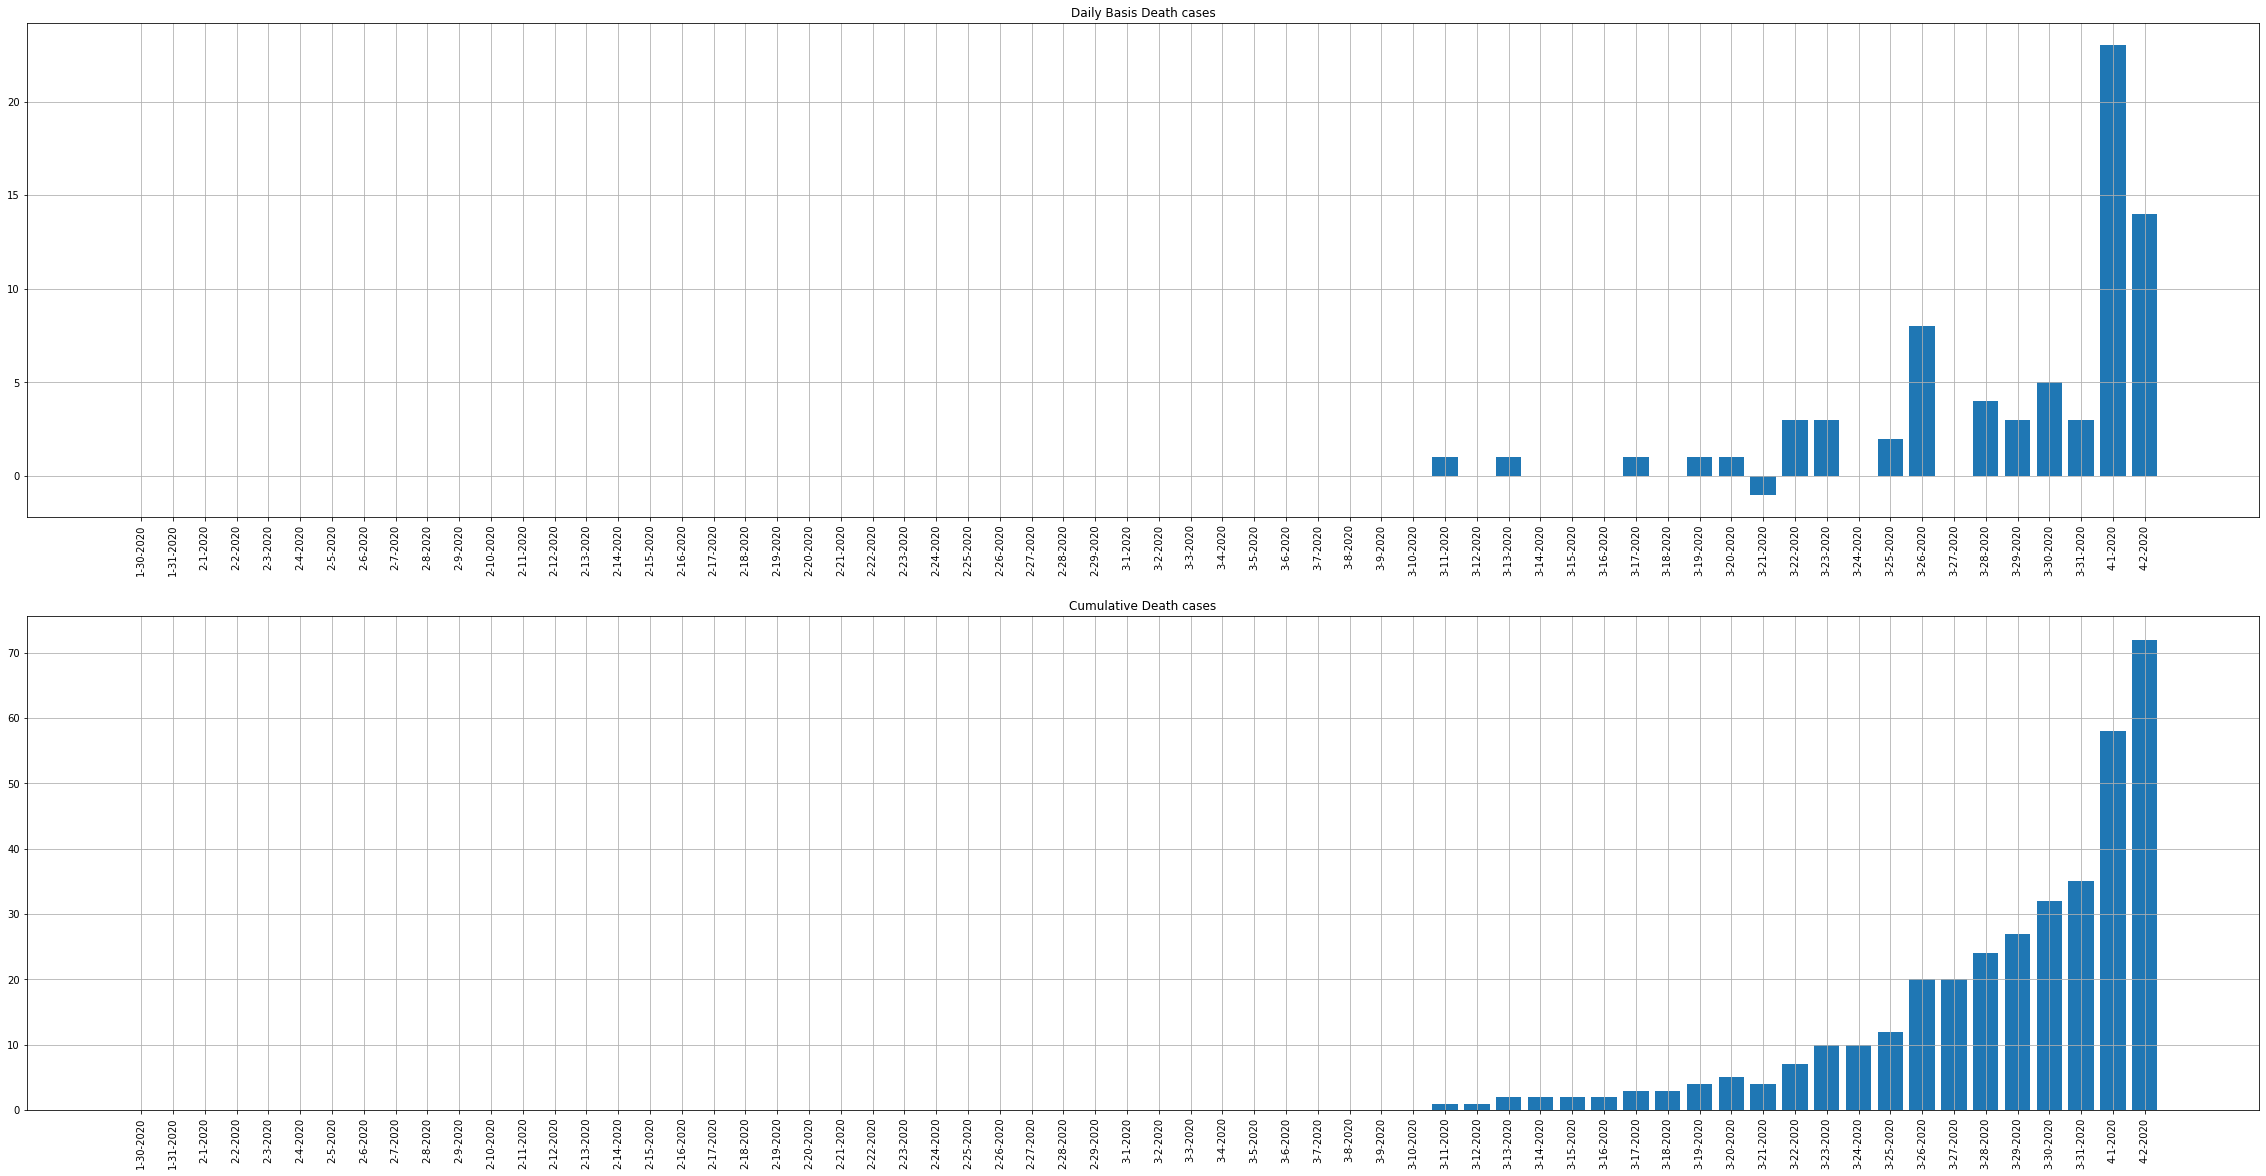

In [104]:
plt.figure("Death cases",figsize=(40,20))
plt.subplot(211)
plt.title("Daily Basis Death cases")
plt.bar(sortedKeys, death)
plt.grid(True)
plt.xticks(rotation='vertical')

plt.subplot(212)
plt.title("Cumulative Death cases")
plt.bar(sortedKeys, cumm_death)
plt.grid(True)
plt.xticks(rotation='vertical')

plt.show()



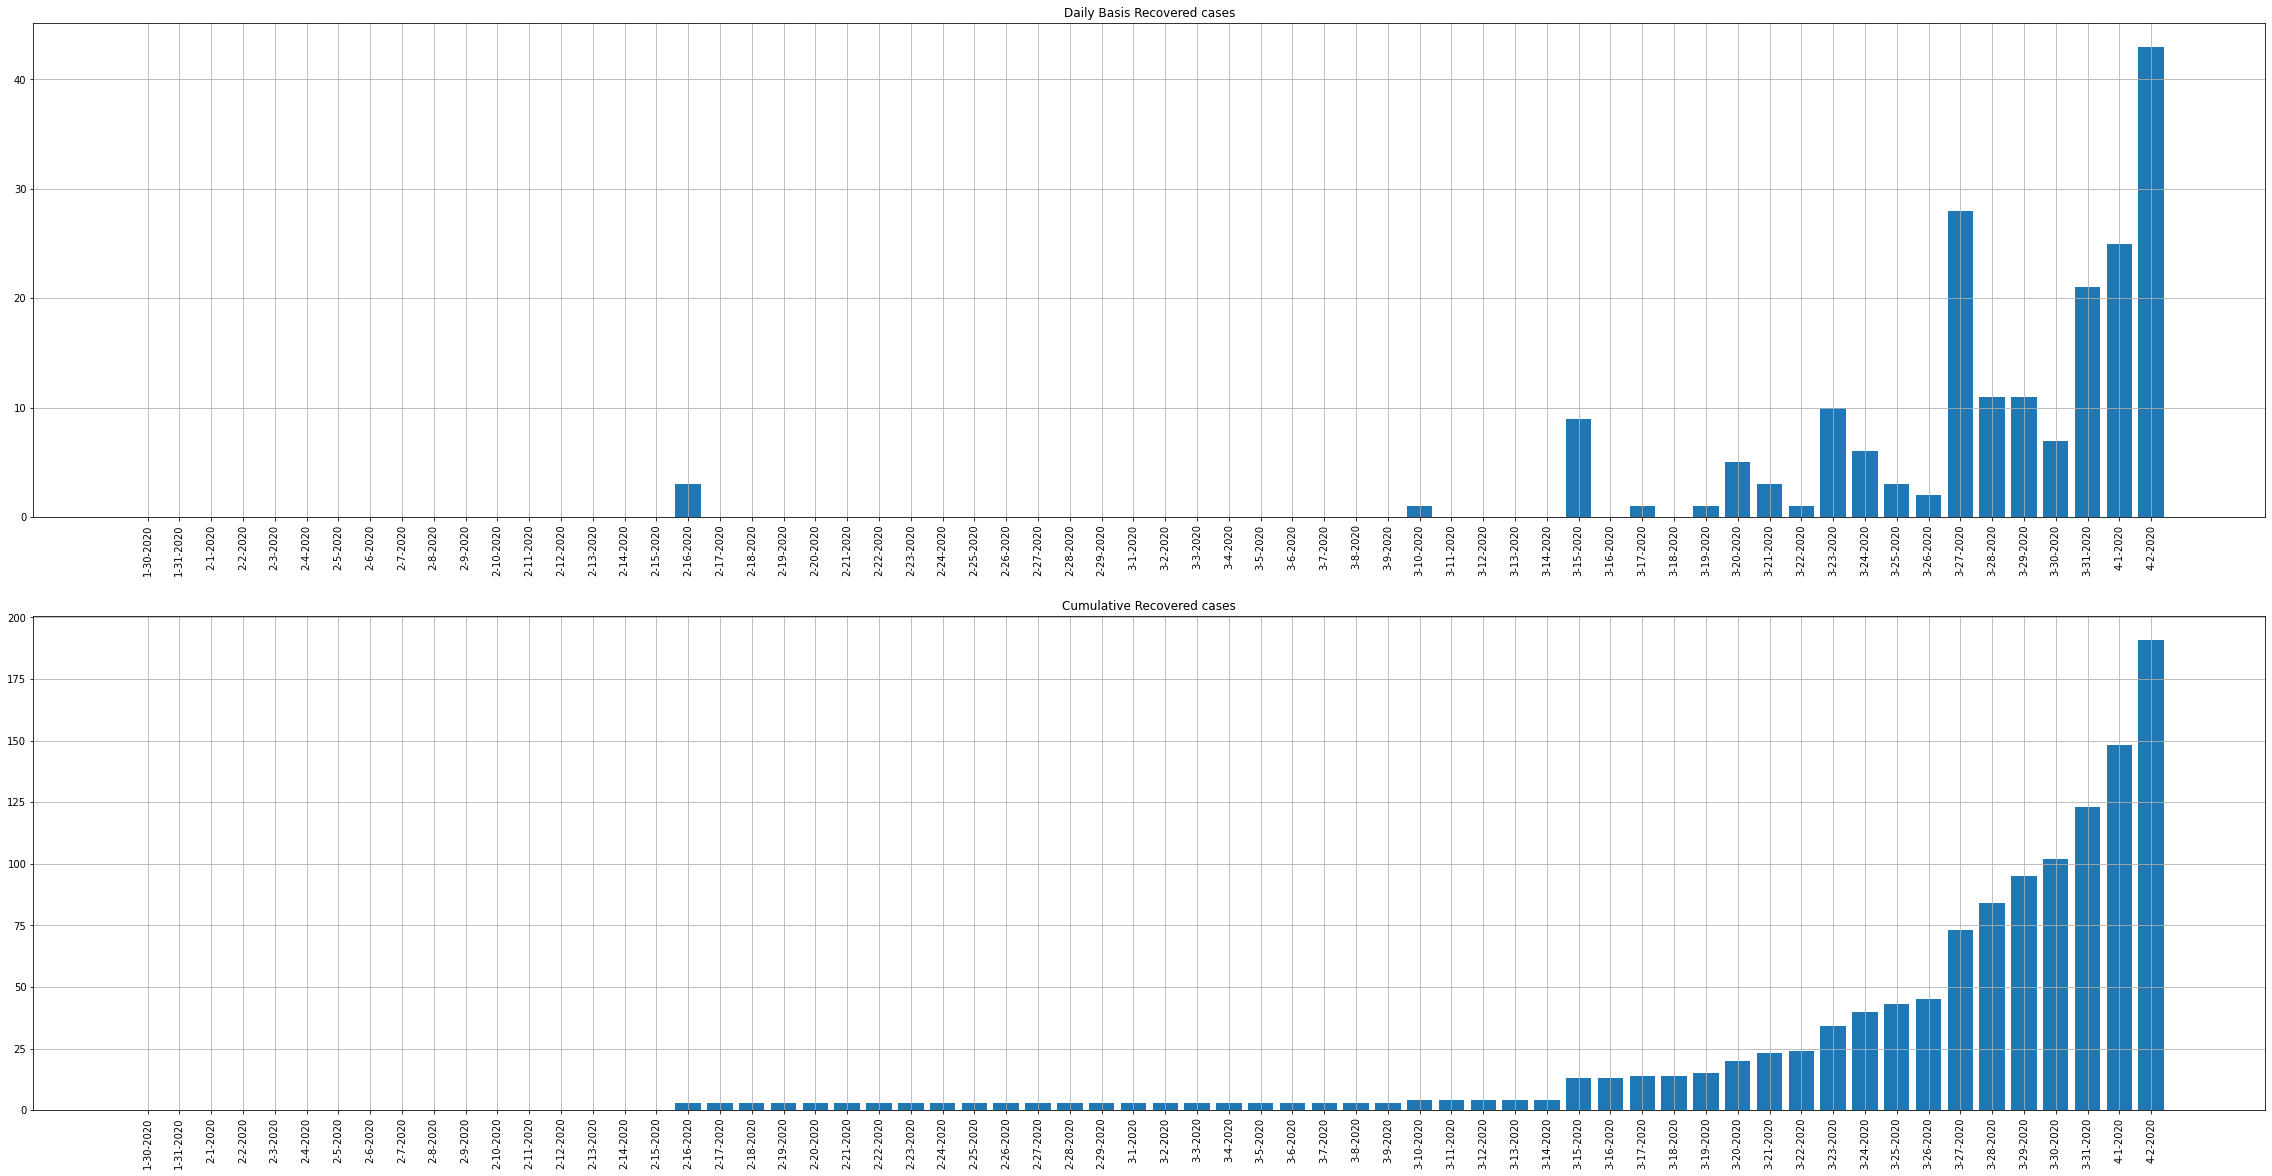

In [105]:
plt.figure("Recovered cases",figsize=(40,20))
plt.subplot(211)
plt.title("Daily Basis Recovered cases")
plt.bar(sortedKeys, recov)
plt.grid(True)
plt.xticks(rotation='vertical')

plt.subplot(212)
plt.title("Cumulative Recovered cases")
plt.bar(sortedKeys, cumm_recov)
plt.grid(True)
plt.xticks(rotation='vertical')

plt.show()


In [0]:
help(datetime)